In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "axes.linewidth": 1.5,
    "lines.linewidth": 2,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    "legend.fontsize": 14,
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "text.usetex": False,
    "figure.figsize": (8, 5),
})

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

In [35]:
cs = np.linspace(0, 1, 257)

sparse_palette = sns.color_palette("Reds", n_colors=4)
spectral_palette = sns.color_palette("Blues", n_colors=4)

color_map = {
    "weighted_rand_sparse_0": sparse_palette[0],
    "weighted_rand_sparse_1": sparse_palette[1],
    "weighted_rand_sparse_2": sparse_palette[2],
    "exact_sparse": sparse_palette[3],
    "rand_svd_0": spectral_palette[0],
    "rand_svd_1": spectral_palette[1],
    "rand_svd_2": spectral_palette[2],
    "low_rank": spectral_palette[3],
    "quantize": "black",
}

def pretty_graph():
    sns.despine()
    plt.tight_layout()
    plt.gca().xaxis.set_ticks_position("bottom")
    plt.gca().yaxis.set_ticks_position("left")
    plt.legend()


Text(167.25000000000003, 0.5, 'L2 Distance')

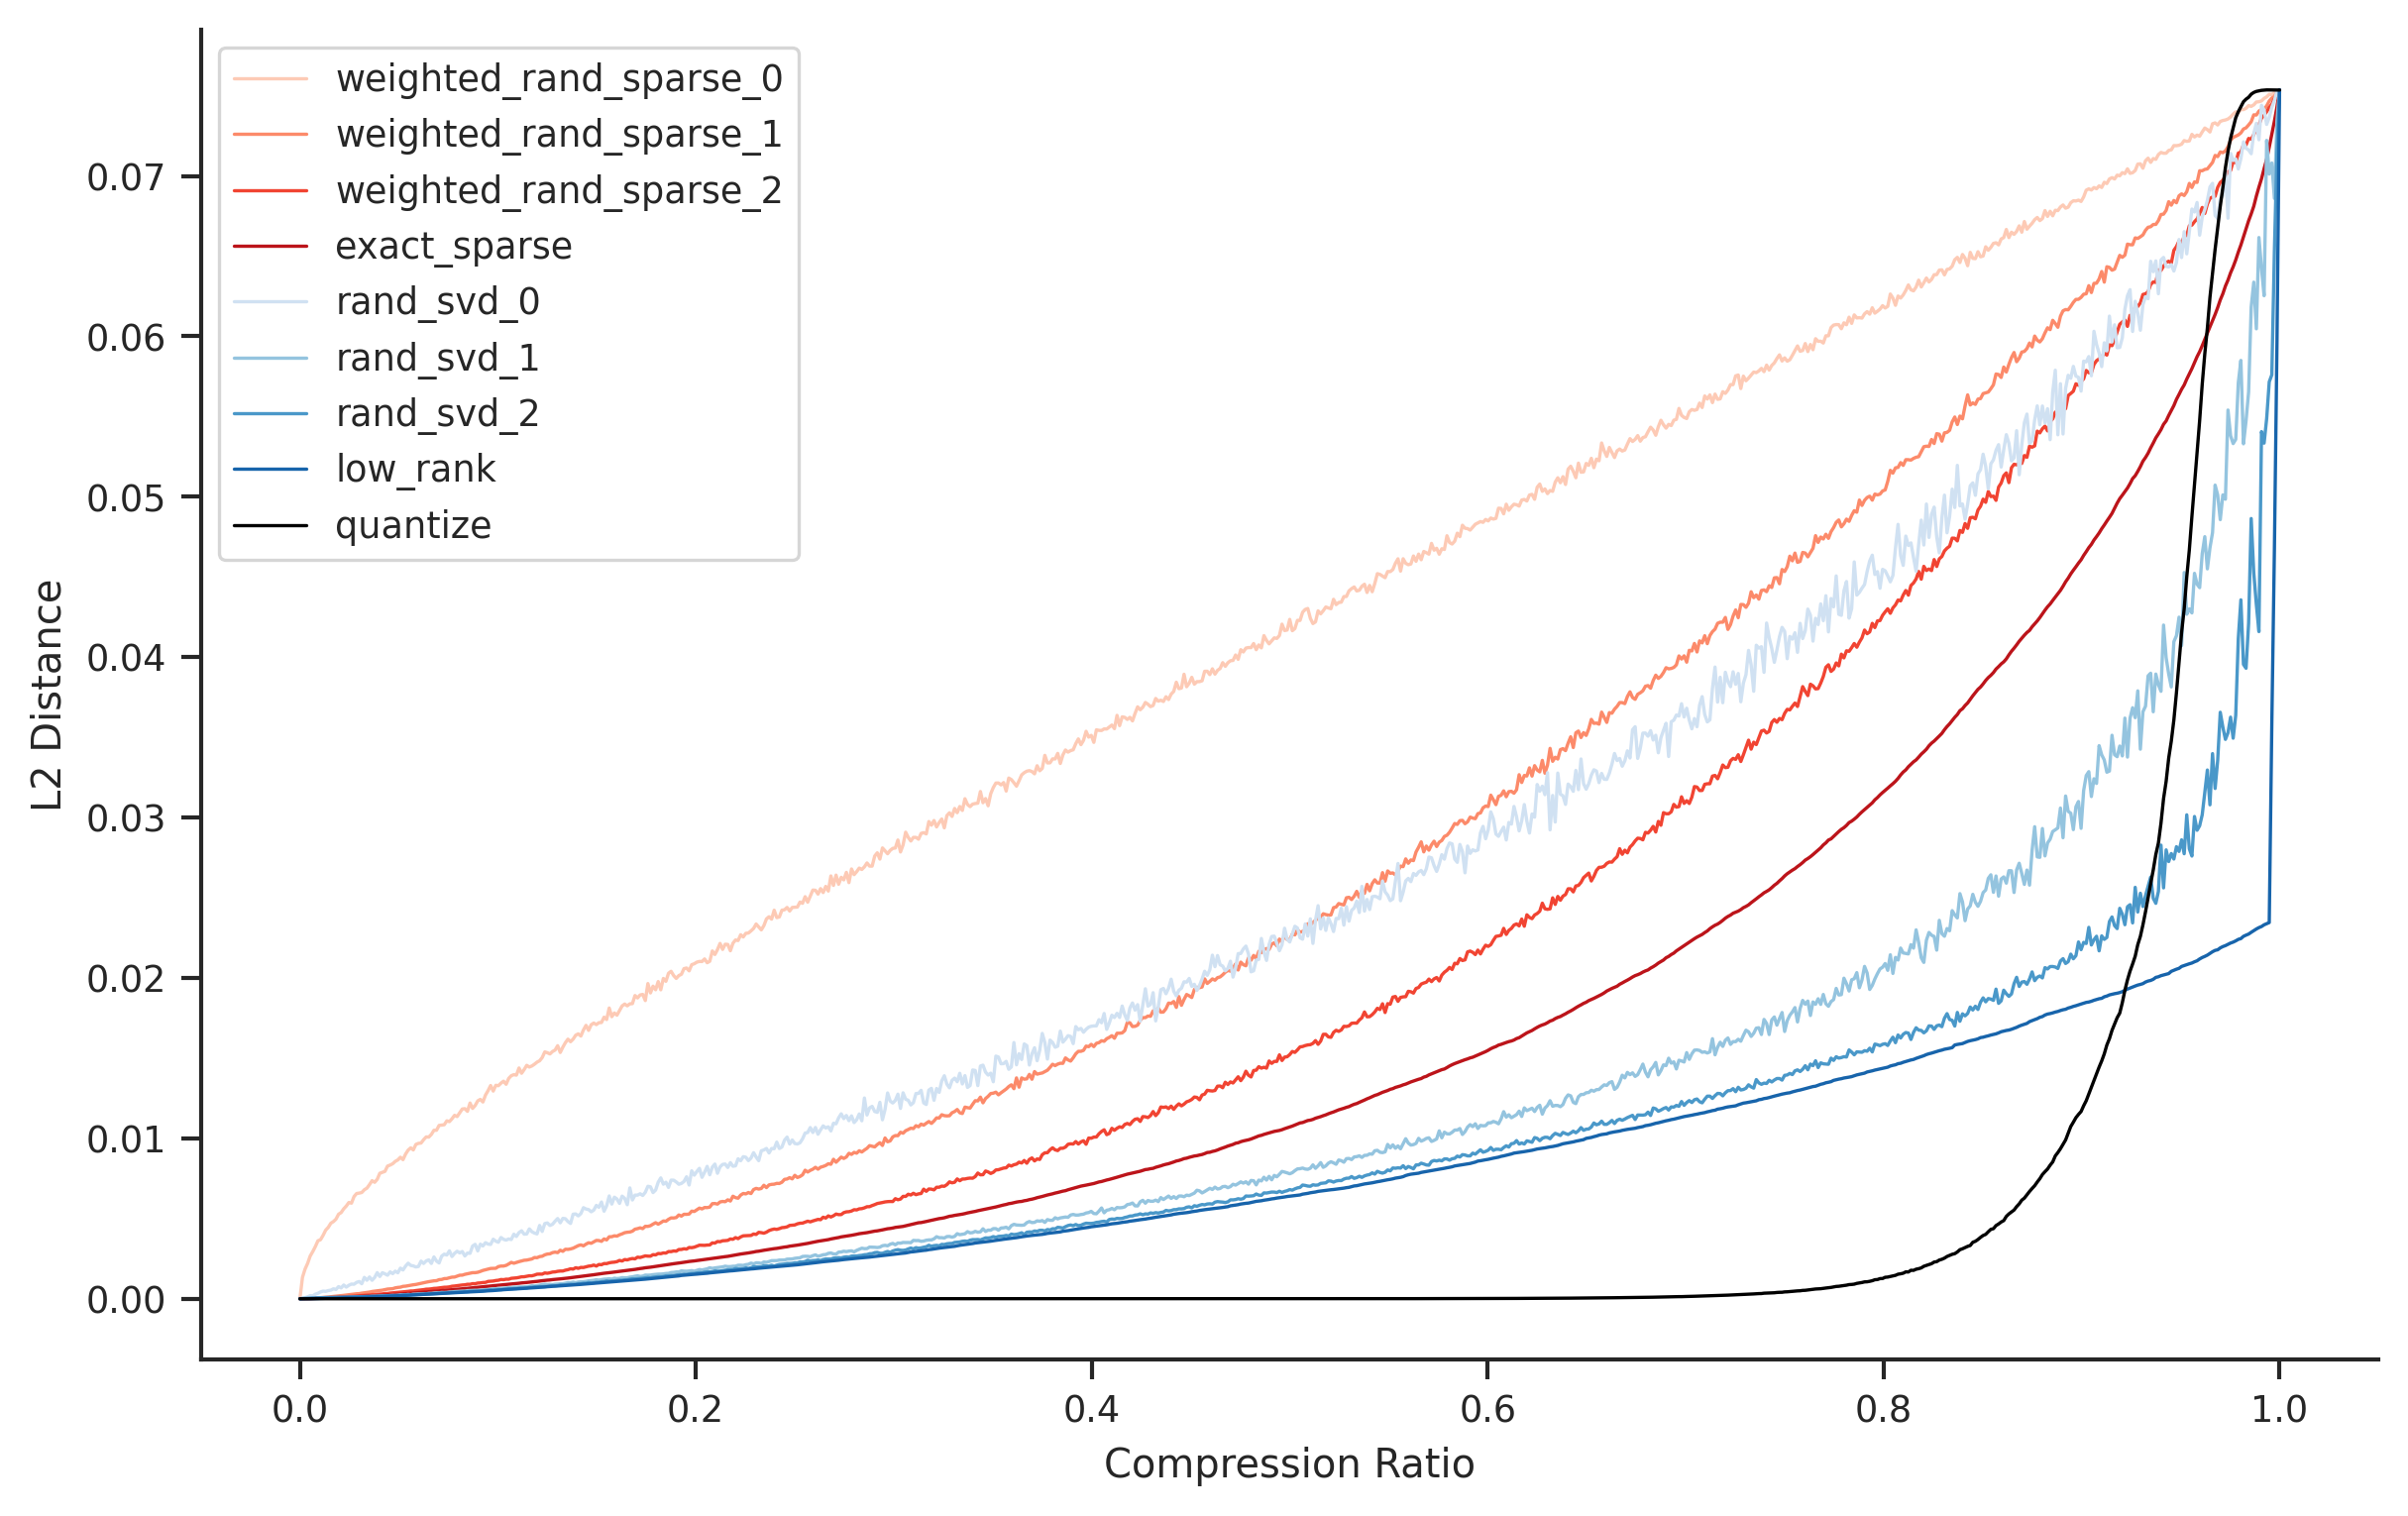

In [36]:
metric = "l2"
# metric = "acc"
# metric = "loss"

ylabel = {
    "l2": "L2 Distance",
    "acc": "Accuracy",
    "loss": "NLL Loss",
}

# experiment = "alexnet_cifar10"
experiment = "distilbert_ag_news"

if experiment == "alexnet_cifar10":
    cs = np.linspace(0, 1, 257)
elif experiment == "distilbert_ag_news":
    cs = np.linspace(0, 1, 769)

for method, color in color_map.items():
    sns.lineplot(x=cs, y=np.load(f"data/{experiment}/aA_ab_{metric}_{method}.npy"), color=color, label=method, linewidth=0.8)

pretty_graph()
plt.xlabel("Compression Ratio")
plt.ylabel(ylabel[metric])

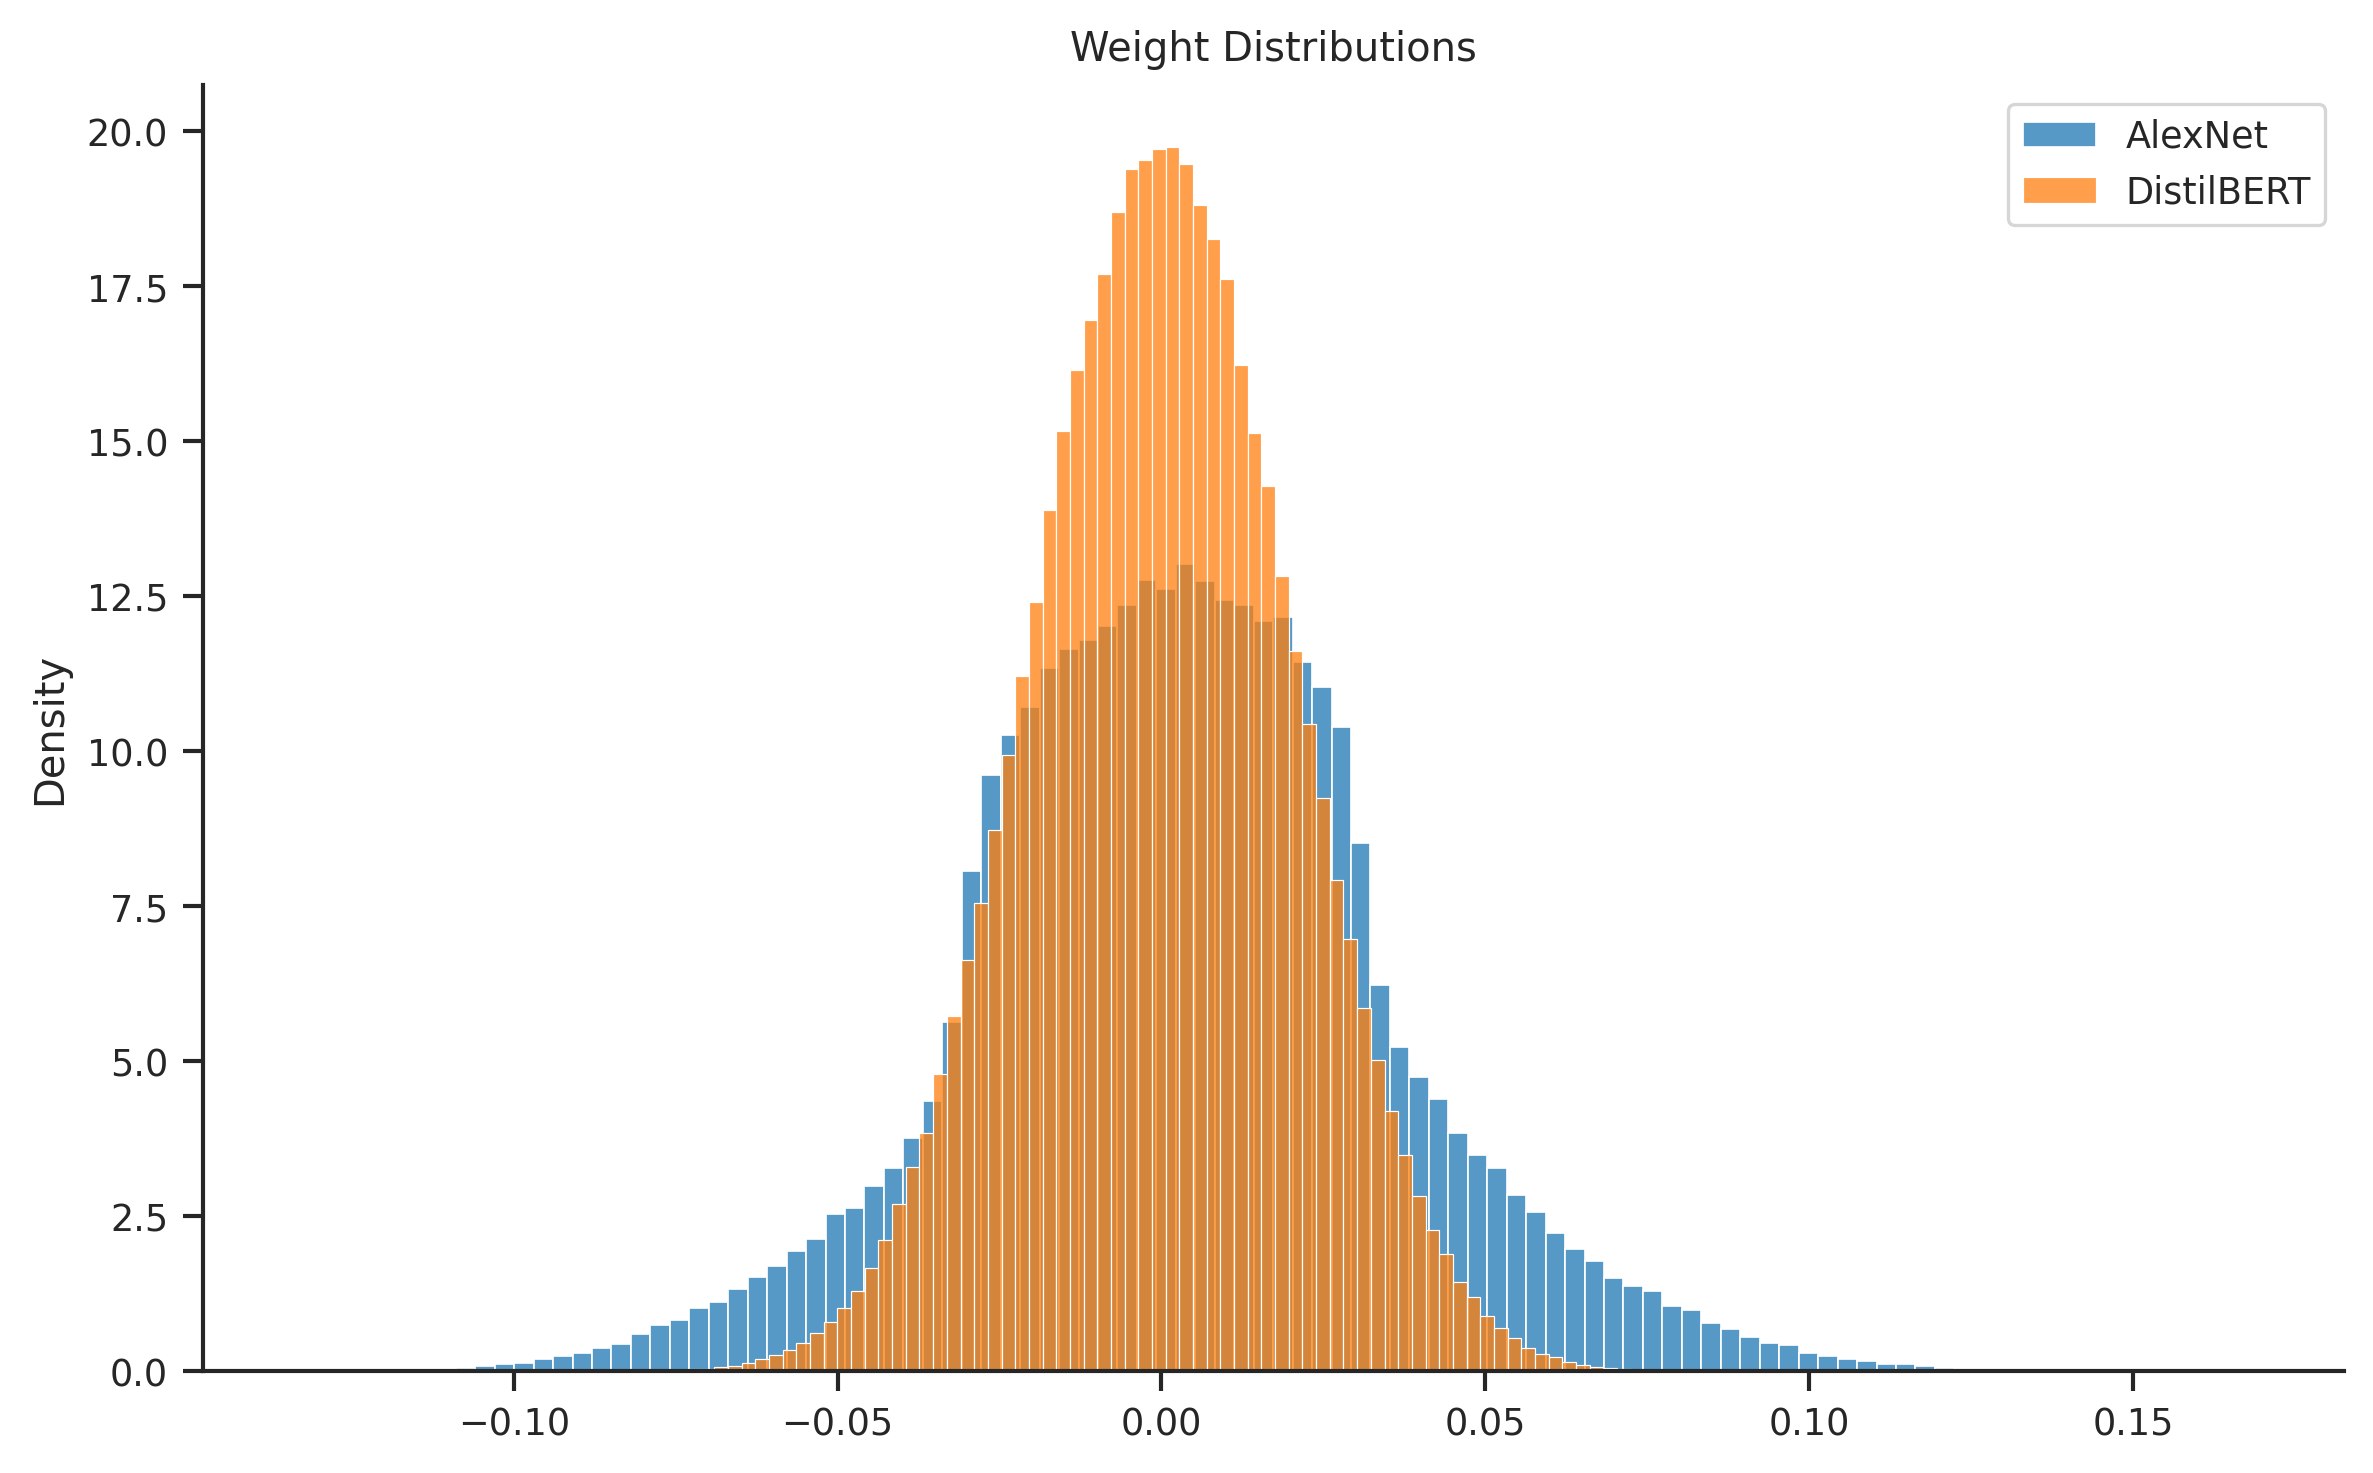

In [37]:
# weight distribution

# alexnet
import torch
from alexnet_cifar10 import AlexNet
alexnet = AlexNet(num_classes=10)
alexnet.load_state_dict(torch.load("modelweights"))
weight_alexnet = alexnet.features[21].weight.data.flatten().numpy()

# distilbert
from transformers import AutoModelForSequenceClassification
distilbert = AutoModelForSequenceClassification.from_pretrained("textattack/distilbert-base-uncased-ag-news")
weight_distilbert = distilbert.pre_classifier.weight.data.flatten().numpy()

sns.histplot(weight_alexnet, bins=100, stat="density", label="AlexNet")
sns.histplot(weight_distilbert, bins=100, stat="density", label="DistilBERT")
plt.title("Weight Distributions")
pretty_graph()